In [1]:
%load_ext autoreload
%autoreload 2
from analysis_settings import *
from plot_settings import *
from scripts.utils_plot import convert_pvalue_to_asterisks, _save_fig
from scripts.utils import get_correlation_df
from matplotlib.patches import Patch
import numpy as np

# Show both, highlight pooled datasets

In [2]:
# n_perm = None
n_perm = 10000

In [3]:
ch_choice = 'ch_dist_sweet'
dataframes = get_dfs(ch_choice)

c_abs = cfg.COLOR_DIC['absolute']
c_per = cfg.COLOR_DIC['periodic']
c_ap = cfg.COLOR_DIC['periodicAP']
c_norm = cfg.COLOR_DIC['normalized']
c_insig = 'grey'

/Users/moritzgerster/Library/CloudStorage/Dropbox/Code/STN_broadband_power/notebooks/analysis_settings.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['sub_hemi_cond'] = df.sub_hemi + '_' + df.cond
/Users/moritzgerster/Library/CloudStorage/Dropbox/Code/STN_broadband_power/notebooks/analysis_settings.py:81: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pivot['UPDRS_exists'] = pivot.UPDRS_bradyrigid_contra.notna()
/Users/moritzgerster/Library/CloudStorage/Dropbox/Code/STN_broadband_power/notebooks/analysis_settings.py:82: 

In [4]:
# def get_correlation_df(df_plot, y, total_power=True, average_hemispheres=False,
#                        use_peak_power=True, corr_method='spearman', bands=None,
#                        band_nmes=None, band_cols=None,
#                        n_perm=10000, add_high_beta_cf=True):
#     psd_kind = df_plot.psd_kind.unique()[0]
#     fm_params = df_plot.fm_params.unique()[0]
#     cond = df_plot.cond.unique()[0]
#     projects = [proj for proj in cfg.PROJECT_ORDER_SLIM
#                 if proj in df_plot.project.unique()]
#     df_corrs = []
#     if use_peak_power:
#         pwr = '_abs_max_log' if total_power else '_fm_powers_max_log'
#         pwr_kind = 'max'
#         freq = '_abs_max_freq' if total_power else '_fm_centerfreqs_max'
#     else:
#         pwr = '_abs_mean_log' if total_power else '_fm_auc_log'
#         pwr_kind = 'mean'
#         freq = '_abs_max_freq' if total_power else '_fm_centerfreqs_max'
#     if bands is None:
#         bands = BANDS
#     band_cols = [band + pwr for band in bands]
#     band_nmes = [cfg.BAND_NAMES_GREEK_SHORT[band] for band in bands]
#     band_nmes = ['\n'.join(band.split(' ')) for band in band_nmes]

#     # Add High Beta Center Frequency
#     if add_high_beta_cf:
#         band_cols += ['beta_high' + freq]
#         # band_nmes += ['High\nBeta CF']
#         band_nmes += ['High Beta\nFreq.']

#     if not total_power:
#         # def ap_pwr(df):
#         #     # fm limits all projects
#         #     f_low = 5
#         #     f_high = 95
#         #     ap_pwr = df.fm_psd_ap_fit_log
#         #     freqs = df.fm_freqs
#         #     mask = (freqs >= f_low) & (freqs <= f_high)
#         #     return ap_pwr[mask].sum()
#         # df_plot = df_plot.dropna(subset=['fm_has_model', 'fm_psd_ap_fit_log'])
#         # df_plot['ap_power'] = df_plot.apply(ap_pwr, axis=1)
#         band_cols += ['fm_offset_log',
#                       'fm_exponent',
#                     #   'ap_power',
#                     #   'fm_exponent_narrow'
#                       ]
#         band_nmes += ['Offset',
#                       '1/f',
#                     #   'Aperiodic Pwr.',
#                     #   '1/f\n(55-75 Hz)'
#                       ]

#     for i, band in enumerate(band_cols):
#         for project in projects:
#             df_sub = df_plot[(df_plot.project == project)]
#             if average_hemispheres:
#                 df_sub = _average_hemispheres(df_sub, band, y,)
#             rho, sample_size, label, _, _ = _corr_results(df_sub, band, y,
#                                                           corr_method,
#                                                           n_perm=n_perm)
#             if rho is None:
#                 continue
#             pval = float(label.split(' ')[-1].strip('p='))
#             dic = {'project': project, 'rho': rho, 'band': band,
#                    'band_nme': band_nmes[i], 'pwr_kind': pwr_kind,
#                    'sample_size': sample_size, 'pval': pval,
#                    'psd_kind': psd_kind, 'total_power': total_power,
#                    'fm_params': fm_params,
#                    'cond': cond,
#                    'corr_method': corr_method, 'y': y}
#             df_corrs.append(dic)
#     df_corrs = pd.DataFrame(df_corrs)
#     return df_corrs


def barplot_UPDRS_bands(df_corrs, save_dir='Figure1', title=False,
                        palette_barplot=None, extension='',
                        figsize=(2.5, 1)):
    kind = df_corrs.kind.unique()[0]
    band_cols = df_corrs.band_nme.unique()
    projects = [proj for proj in cfg.PROJECT_ORDER_SLIM
                if proj in df_corrs.project.unique()]
    df_single = df_corrs[(df_corrs.project != 'all')]
    df_all = df_corrs[(df_corrs.project == 'all')]
    if palette_barplot is None:
        if df_corrs.project.nunique() == 1:
            color_all = cfg.COLOR_DIC[kind]
            # color_all = cfg.COLOR_DIC[df_corrs.project.unique()[0]]
        else:
            color_all = cfg.COLOR_DIC["all3"]
        plot_all = {'data': df_all, 'color': color_all, 'width': 0.6}
    else:
        plot_all = {'data': df_all, 'palette': palette_barplot, 'width': 0.6}

    # if kind == 'normalized':
    #     color_all = cfg.COLOR_DIC["all3"]  # black too black
    # else:
    #     color_all = cfg.COLOR_DIC[kind]

    palette = [cfg.COLOR_DIC[proj + "3"] for proj in projects]

    fig, ax = plt.subplots(1, 1, figsize=figsize, sharey=True)

    plot_kwargs = {'ax': ax, 'x': 'band_nme', 'y': 'rho', "order": band_cols,
                   'legend': False}
    plot_single = {'data': df_single,'hue': 'project',
                  'palette': palette, 'alpha': 1, 'width': 0.4}

    sns.barplot(**plot_all, **plot_kwargs)
    sns.barplot(**plot_single, **plot_kwargs)

    # add significance star for bars where pval < 0.05
    if len(ax.containers) > 2:
        bars_pooled = ax.containers[0]  # select all project
    else:
        bars_pooled = ax.containers
    _, ymax = ax.get_ylim()
    for bar, band in zip(bars_pooled, band_cols):
        df_band = df_all[(df_all.band_nme == band)]
        pvalue = df_band.pval.values[0]
        text = convert_pvalue_to_asterisks(pvalue)
        if isinstance(bar, list):
            bar = bar[0]
        # bar = bar[0]
        x_bar = bar.get_x() + bar.get_width() / 2
        ax.annotate(text, xy=(x_bar, ymax*.9), ha='center', va='bottom',
                    fontsize=FONTSIZE_ASTERISK,
                    # color=color_all
                    )
    xticklabels = []
    for xticklabel in df_all.band_nme.unique():
        xticklabels.append(xticklabel)
    ax.set_xticklabels(xticklabels)
    ax.set_xlabel(None)
    corr_method = df_all.corr_method.unique()[0]
    y = df_corrs['y'].unique()[0]
    # if y == 'UPDRS_III':
    #     y_string = 'UPDRS-III'
    # elif y == 'UPDRS_bradyrigid_contra':
    #     y_string = 'BR'
    # elif y == 'patient_days_after_implantation':
    #     y_string = 'Days after surgery'
    if y == 'patient_days_after_implantation':
        kind_str = 'Relative' if kind == 'normalized' else 'Absolute'
        ylabel = f'{kind_str} power ~ days after surgery'
    elif corr_method == 'spearman':
        # ylabel = r"Spearman $\rho$"
        # if kind == 'absolute':
        #     kind_str = 'Abs.'
        # elif kind == 'normalized':
        #     kind_str = 'Rel.'
        # ylabel = f'{kind_str} Power ~ {y_string}'r" [$\rho$]"
        # ylabel = r"Peak Power $[\rho]$"
        ylabel = r"$\rho$"
    elif corr_method == 'within':
        ylabel = r"$r_{rm}$"
    elif corr_method == 'withinRank':
        # ylabel = f'Peak power ~ {y_string}'  # r"$r_{\text{rank rm}}$"
        ylabel = r"$r_{\text{rank rm}}$"
    if title == True:
        ax.set_title(ylabel)
        unit_alone = r"$\rho$"
        ax.set_ylabel(unit_alone)
    elif isinstance(title, str):
        ax.set_title(title)
    else:
        ax.set_ylabel(ylabel)
    cond = df_all.cond.unique()[0]
    updrs = df_all.y.unique()[0]
    pwr_kind = df_all.pwr_kind.unique()[0]
    n_perm = df_corrs.n_perm.unique()[0]
    fname = f'band_UPDRS_{kind}_{cond}_{updrs}_{corr_method}_{pwr_kind}_nperm={n_perm}{extension}'
    plt.tight_layout()
    _save_fig(fig, f'{save_dir}/{fname}', SAVE_DIR, close=False,
              transparent=True, bbox_inches=None)


def barplot_UPDRS_periodic(df_corrs, save_dir='Figure5'):
    kind = df_corrs.kind.unique()[0]
    band_cols = df_corrs.band_nme.unique()
    cond = df_corrs.cond.unique()[0]
    palette = [(sns.color_palette()[0])] + list(sns.color_palette("flare", 3))


    fig, ax = plt.subplots(1, 1, figsize=((len(band_cols)) / 16, .4),
                           sharey=True)
    # fig, ax = plt.subplots(1, 1, figsize=(1.8, .4), sharey=True)

    plot_kwargs = {'ax': ax, 'x': 'band_nme', 'y': 'rho', "order": band_cols,
                   'legend': False, 'data': df_corrs, 'width': 0.6,
                   'palette': palette}
    sns.barplot(**plot_kwargs)
    ax.hlines(0, *ax.get_xlim(), lw=0.1, color='k')

    # add significance star for bars where pval < 0.05
    bars_pooled = ax.containers
    ymin, ymax = ax.get_ylim()
    ydiff = ymax - ymin
    for bar, band in zip(bars_pooled, band_cols):
        df_band = df_corrs[(df_corrs.band_nme == band)]
        pvalue = df_band.pval.values[0]
        text = convert_pvalue_to_asterisks(pvalue, stack_vertically=True)
        x_bar = bar[0].get_x() + bar[0].get_width() / 2
        y_bar = bar[0].get_height()
        # offset = np.abs(y_bar) * 1.01 * np.sign(y_bar)
        # va = 'bottom' if y_bar > 0 else 'top'
        # offset = max(y_bar * .8, 0)   #+ 0.01
        offset = max(y_bar, 0) - 0.15 * ydiff
        # va = 'top'
        # offset = max(y_bar, 0) - .1  #+ 0.01
        va = 'bottom'
        ax.annotate(text, xy=(x_bar, offset), ha='center', va=va,
                    fontsize=FONTSIZE_ASTERISK, linespacing=.15)
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_xlabel(None)
    # hide x-axis and move y-axis to right
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(True)
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position("right")

    corr_method = df_corrs.corr_method.unique()[0]
    if corr_method == 'spearman':
        ylabel = r"Spearman $\rho$"
    elif corr_method == 'within':
        ylabel = r"$r_{rm}$"
    elif corr_method == 'withinRank':
        ylabel = r"$r_{\text{rank rm}}$"
    ax.set_ylabel(ylabel)
    cond = df_corrs.cond.unique()[0]
    updrs = df_corrs.y.unique()[0]
    pwr_kind = df_corrs.pwr_kind.unique()[0]
    fname = f'band_UPDRS_{kind}_{cond}_{updrs}_{corr_method}_{pwr_kind}'
    plt.tight_layout()
    # _save_fig(fig, f'{save_dir}/{fname}', SAVE_DIR, close=False,
    #           transparent=True, bbox_inches=None)
    plt.show()
    if cond == 'on':
        export_legend(save_dir, band_cols, palette, fname)


def export_legend(save_dir, band_cols, palette, fname):
    handles = [Patch(color=color) for color in palette]
    labels = [band_nme for band_nme in band_cols]
    legend = plt.legend(handles, labels, loc=3, framealpha=1,
                            frameon=True, ncol=1)
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    filename = join(SAVE_DIR, save_dir, f'{fname}_legend.pdf')
    fig.savefig(filename, dpi="figure", bbox_inches=bbox, transparent=True)
    plt.show()

        # fig, ax = plt.subplots(1, 1, figsize=figsize)
        # ax.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 1),
        #           ncol=1)
        # _save_fig(fig, f'{save_dir}/{fname}_legend', SAVE_DIR, close=False,
        #       transparent=True)


# def barplot_UPDRS_kinds(df_corrs, save_dir='Figure5'):
#     figsize = (2.75, 1)
#     if 'Lorentzian' in df_corrs.kind.unique():
#         hue_order = ['Normalized Plateau', 'Lorentzian']
#     else:
#         hue_order = ['Relative', 'Absolute', 'Periodic']
#     palette = [cfg.COLOR_DIC[kind] for kind in hue_order]
#     # df_corrs['kind'] = df_corrs['kind'].apply(cfg.KIND_DICT)

#     fig, ax = plt.subplots(1, 1, figsize=figsize, sharey=True)

#     plot_kwargs = {'ax': ax, 'x': 'band_nme', 'y': 'rho',
#                    'hue': 'kind', 'hue_order': hue_order,
#                    'palette': palette, 'legend': False}
#     plot_all = {'data': df_corrs, 'color': color_all, 'width': 0.6}

#     sns.barplot(**plot_all, **plot_kwargs)

#     # add significance star for bars where pval < 0.05
#     _, ymax = ax.get_ylim()
#     for i, kind in enumerate(hue_order):
#         df_kind = df_corrs[(df_corrs.kind == kind)]
#         band_cols = df_kind.band_nme.unique()
#         bars_pooled = ax.containers[i]
#         for bar, band in zip(bars_pooled, band_cols):
#             df_band = df_kind[(df_kind.band_nme == band)]
#             pvalue = df_band.pval.values[0]
#             text = convert_pvalue_to_asterisks(pvalue, stack_vertically=True)
#             x_bar = bar.get_x() + bar.get_width() / 2
#             ax.annotate(text, xy=(x_bar, ymax*.9), ha='center', va='bottom',
#                         color=palette[i], linespacing=.1,
#                         fontsize=FONTSIZE_ASTERISK)
#     xticklabels = []
#     for xticklabel in df_corrs.band_nme.unique():
#         xticklabels.append(xticklabel)
#     ax.set_xticklabels(xticklabels)
#     ax.set_xlabel(None)
#     corr_method = df_corrs.corr_method.unique()[0]
#     if corr_method == 'spearman':
#         ylabel = r"Spearman $\rho$"
#     elif corr_method == 'within':
#         ylabel = r"$r_{rm}$"
#     elif corr_method == 'withinRank':
#         ylabel = r"$r_{\text{rank rm}}$"
#     ax.set_ylabel(ylabel)
#     cond = df_corrs.cond.unique()[0]
#     updrs = df_corrs.y.unique()[0]
#     fname = f'band_UPDRS_kinds_{cond}_{updrs}_{corr_method}'
#     _save_fig(fig, save_dir + fname, SAVE_DIR, close=False)

# Figure 1

all $\delta$: rho=-0.19, p=0.04


all $\theta$: rho=-0.18, p=0.05


all $\alpha$: rho=-0.12, p=0.20


all L$\beta$: rho=0.26, p=0.00


all H$\beta$: rho=-0.02, p=0.79


all L$\gamma$: rho=-0.10, p=0.25




/var/folders/1y/49sjn_6j1_sgl474yd2zw6pc0000gn/T/ipykernel_92983/1725807590.py:110: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.barplot(**plot_single, **plot_kwargs)
/var/folders/1y/49sjn_6j1_sgl474yd2zw6pc0000gn/T/ipykernel_92983/1725807590.py:133: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticklabels)


all $\delta$: rho=-0.23, p=0.00


all $\theta$: rho=-0.16, p=0.02


all $\alpha$: rho=-0.12, p=0.07


all L$\beta$: rho=0.19, p=0.01


all H$\beta$: rho=0.01, p=0.83


all L$\gamma$: rho=-0.00, p=0.99




/var/folders/1y/49sjn_6j1_sgl474yd2zw6pc0000gn/T/ipykernel_92983/1725807590.py:110: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.barplot(**plot_single, **plot_kwargs)
/var/folders/1y/49sjn_6j1_sgl474yd2zw6pc0000gn/T/ipykernel_92983/1725807590.py:133: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticklabels)


all $\delta$: rho=0.11, p=0.25


all $\theta$: rho=0.18, p=0.07


all $\alpha$: rho=0.16, p=0.10


all L$\beta$: rho=0.26, p=0.01


all H$\beta$: rho=-0.06, p=0.58


all L$\gamma$: rho=-0.26, p=0.01




/var/folders/1y/49sjn_6j1_sgl474yd2zw6pc0000gn/T/ipykernel_92983/1725807590.py:110: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.barplot(**plot_single, **plot_kwargs)
/var/folders/1y/49sjn_6j1_sgl474yd2zw6pc0000gn/T/ipykernel_92983/1725807590.py:133: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticklabels)


all $\delta$: rho=0.11, p=0.13


all $\theta$: rho=0.16, p=0.03


all $\alpha$: rho=0.05, p=0.54


all L$\beta$: rho=0.10, p=0.16


all H$\beta$: rho=-0.04, p=0.60


all L$\gamma$: rho=-0.16, p=0.03




/var/folders/1y/49sjn_6j1_sgl474yd2zw6pc0000gn/T/ipykernel_92983/1725807590.py:110: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.barplot(**plot_single, **plot_kwargs)
/var/folders/1y/49sjn_6j1_sgl474yd2zw6pc0000gn/T/ipykernel_92983/1725807590.py:133: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticklabels)


all $\delta$: rho=-0.08, p=0.44


all $\theta$: rho=-0.07, p=0.48


all $\alpha$: rho=-0.08, p=0.42


all L$\beta$: rho=0.35, p=0.00


all H$\beta$: rho=-0.06, p=0.56


all L$\gamma$: rho=-0.31, p=0.00




/var/folders/1y/49sjn_6j1_sgl474yd2zw6pc0000gn/T/ipykernel_92983/1725807590.py:110: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.barplot(**plot_single, **plot_kwargs)
/var/folders/1y/49sjn_6j1_sgl474yd2zw6pc0000gn/T/ipykernel_92983/1725807590.py:133: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticklabels)


all $\delta$: rho=-0.11, p=0.13


all $\theta$: rho=-0.08, p=0.32


all $\alpha$: rho=-0.09, p=0.26


all L$\beta$: rho=0.34, p=0.00


all H$\beta$: rho=-0.09, p=0.24


all L$\gamma$: rho=-0.29, p=0.00




/var/folders/1y/49sjn_6j1_sgl474yd2zw6pc0000gn/T/ipykernel_92983/1725807590.py:110: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.barplot(**plot_single, **plot_kwargs)
/var/folders/1y/49sjn_6j1_sgl474yd2zw6pc0000gn/T/ipykernel_92983/1725807590.py:133: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticklabels)


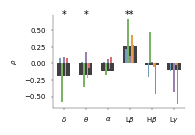

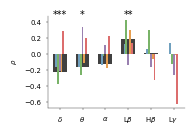

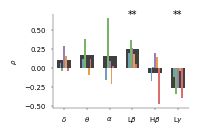

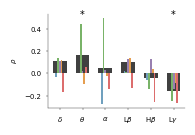

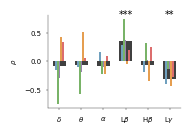

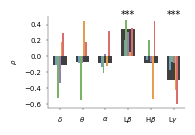

In [5]:
# y = "UPDRS_bradyrigid_contra"
# y = "UPDRS_III"
ch_choice = 'ch_dist_sweet'
bands = BANDS
# for kind in ['normalized', 'absolute', 'periodic', 'normalizedPlateau', 'lorentzian100']:
for kind in ['normalized']:
    if kind == 'normalized':
        df_plot = dataframes['df_norm']
        total_power = True
    elif kind == 'normalizedPlateau':
        df_plot = dataframes['df_normPlateau']
        total_power = True
    elif kind == 'absolute':
        df_plot = dataframes['df_abs']
        total_power = True
    elif kind == 'periodic':
        df_plot = dataframes['df_per']
        total_power = False

    for cond in ['off', "on", 'offon_abs']:
    # for cond in ['off']:
        data = df_plot[(df_plot.cond == cond)]

        # only plot all subjects pooled!
        # data = data[(data.project == 'all')]

        for corr_method in ['spearman']:
            folder = 'Figure5' if corr_method.startswith('within') else KIND_DIR[kind]
            save_dir = f'{folder}/{ch_choice}'
            for y in ['UPDRS_III', 'UPDRS_bradyrigid_contra']:
                df_corr = get_correlation_df(data, y, total_power=total_power,
                                            n_perm=n_perm,
                                            add_high_beta_cf=False,
                                            use_peak_power=True, bands=bands,
                                            corr_method=corr_method)
                df_corr['kind'] = kind
                barplot_UPDRS_bands(df_corr, save_dir=save_dir,
                                    figsize=(1.9, 1.3))

# Stun effect

all $\delta$: rho=-0.14, p=0.10


all $\theta$: rho=-0.25, p=0.00


all $\alpha$: rho=-0.09, p=0.32


all L$\beta$: rho=0.14, p=0.10


all H$\beta$: rho=0.21, p=0.02


all L$\gamma$: rho=0.18, p=0.04




/var/folders/1y/49sjn_6j1_sgl474yd2zw6pc0000gn/T/ipykernel_92983/1725807590.py:110: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.barplot(**plot_single, **plot_kwargs)
/var/folders/1y/49sjn_6j1_sgl474yd2zw6pc0000gn/T/ipykernel_92983/1725807590.py:133: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticklabels)


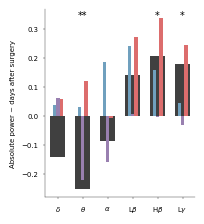

In [6]:
# y = "UPDRS_bradyrigid_contra"
y = "patient_days_after_implantation"
ch_choice = 'ch_dist_sweet'
bands = BANDS
total_power = True
kind = 'absolute'
# kind = 'normalized'
df_plot = dataframes['df_abs']
# df_plot = dataframes['df_norm']

exclude_subs = [
    'Hir',
                'Lit',
                # 'Flo'
                ]


# for cond in ['offon_abs', 'off', 'on']:
for cond in ['off']:
    data = df_plot[(df_plot.cond == cond)]

    # only plot all subjects pooled!
    # data = data[(data.project == 'all')]

    for exclude in exclude_subs:
        data = data[~data.subject.str.startswith(exclude)]

    for corr_method in ['spearman']:
        # folder = 'Figure5' if corr_method.startswith('within') else KIND_DIR[kind]
        save_dir = f'Figure1/{ch_choice}'
        df_corr = get_correlation_df(data, y, total_power=total_power,
                                        n_perm=n_perm,
                                        bands=BANDS, # + ['gamma_broad'],
                                        add_high_beta_cf=False,
                                        # use_peak_power=True,
                                        use_peak_power=False,
                                        corr_method=corr_method)
        df_corr['kind'] = kind
        barplot_UPDRS_bands(df_corr, save_dir=save_dir,
                            title=False,
                            # title=r'Abs. power ~ days after surgery [$\rho$]',
                            figsize=(2, 2.2))

all $\delta$: rho=-0.19, p=0.03


all $\theta$: rho=-0.42, p=0.00


all $\alpha$: rho=-0.26, p=0.00


all L$\beta$: rho=0.31, p=0.00


all H$\beta$: rho=0.36, p=0.00


all L$\gamma$: rho=0.19, p=0.03




/var/folders/1y/49sjn_6j1_sgl474yd2zw6pc0000gn/T/ipykernel_92983/1725807590.py:110: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.barplot(**plot_single, **plot_kwargs)
/var/folders/1y/49sjn_6j1_sgl474yd2zw6pc0000gn/T/ipykernel_92983/1725807590.py:133: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticklabels)


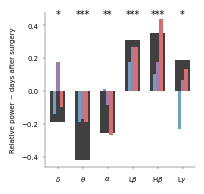

In [7]:
# y = "UPDRS_bradyrigid_contra"
y = "patient_days_after_implantation"
ch_choice = 'ch_dist_sweet'
bands = BANDS
total_power = True
kind = 'normalized'
# kind = 'normalized'
# df_plot = dataframes['df_abs']
df_plot = dataframes['df_norm']

exclude_subs = [
    'Hir',
                'Lit',
                # 'Flo'
                ]


# for cond in ['offon_abs', 'off', 'on']:
for cond in ['off']:
    data = df_plot[(df_plot.cond == cond)]

    # only plot all subjects pooled!
    # data = data[(data.project == 'all')]

    for exclude in exclude_subs:
        data = data[~data.subject.str.startswith(exclude)]

    for corr_method in ['spearman']:
        # folder = 'Figure5' if corr_method.startswith('within') else KIND_DIR[kind]
        save_dir = f'Figure1/{ch_choice}'
        df_corr = get_correlation_df(data, y, total_power=total_power,
                                        n_perm=n_perm,
                                        bands=BANDS, # + ['gamma_broad'],
                                        add_high_beta_cf=False,
                                        # use_peak_power=True,
                                        use_peak_power=False,
                                        corr_method=corr_method)
        df_corr['kind'] = kind
        barplot_UPDRS_bands(df_corr, save_dir=save_dir,
                            title=False,
                            # title=r'Abs. power ~ days after surgery [$\rho$]',
                            figsize=(2, 1.9))

In [8]:
# # y = "UPDRS_bradyrigid_contra"
# y = "patient_days_after_implantation"
# ch_choice = 'ch_dist_sweet'
# bands = BANDS
# total_power = False
# kind = 'periodic'
# # kind = 'normalized'
# df_plot = dataframes['df_abs']
# # df_plot = dataframes['df_norm']

# exclude_subs = ['Hir', 'Lit',
#                 'Flo'
#                 ]


# # for cond in ['offon_abs', 'off', 'on']:
# for cond in ['off']:
#     data = df_plot[(df_plot.cond == cond)]

#     # only plot all subjects pooled!
#     # data = data[(data.project == 'all')]

#     for exclude in exclude_subs:
#         data = data[~data.subject.str.startswith(exclude)]

#     for corr_method in ['spearman']:
#         # folder = 'Figure5' if corr_method.startswith('within') else KIND_DIR[kind]
#         save_dir = f'Figure3/{ch_choice}'
#         df_corr = get_correlation_df(data, y, total_power=total_power,
#                                         n_perm=n_perm,
#                                         bands=BANDS,
#                                         add_high_beta_cf=False,
#                                         use_peak_power=True,
#                                         corr_method=corr_method)
#         df_corr['kind'] = kind
#         barplot_UPDRS_bands(df_corr, save_dir=save_dir,
#                             figsize=(2.5, 1.3))

In [9]:
# # n_perm = None
# n_perm = 10000

In [10]:
# # Settings
# y = "UPDRS_bradyrigid_contra"
# ch_choice = 'ch_dist_sweet'
# save_dir = f'Figure5/{ch_choice}'
# corr_method = 'withinRank'
# dominant_side_consistent = True

# bands = BANDS + ['gamma_mid', 'gamma']
# # for kind in ['normalized', 'absolute', 'periodic']:
# for kind in ['absolute']:
#     if kind == 'normalized':
#         df = dataframes['df_norm']
#         total_power = True
#         palette_barplot = None
#     elif kind == 'normalizedPlateau':
#         df = dataframes['df_normPlateau']
#         total_power = True
#         palette_barplot = None
#     elif kind == 'absolute':
#         df = dataframes['df_abs']
#         total_power = True
#         palette_barplot = None
#     elif kind == 'periodic':
#         df = dataframes['df_abs']
#         total_power = False
#         palette_barplot = [c_per] * len(bands) + [c_ap] * 2

#     for cond in ['on']:
#         df = df[(df.cond == cond) & (df.project == 'all')]

#         # remove subject where asymmetry switches between On and Off
#         if dominant_side_consistent is not None:
#             df = df[df.dominant_side_consistent == dominant_side_consistent]

#             if kind.startswith('periodic'):
#                 subs_no_fit = df[df.fm_has_model.isna()].subject.unique()
#                 df = df[~df.subject.isin(subs_no_fit)]

#             # remove subject with only one condition
#             subject_counts = df.subject.value_counts()
#             valid_subjects = subject_counts[subject_counts == 2].index
#             df = df[df.subject.isin(valid_subjects)]

#         df_corr = get_correlation_df(df, y, total_power=total_power,
#                                         n_perm=n_perm,
#                                         add_high_beta_cf=False,
#                                         use_peak_power=True, bands=bands,
#                                         corr_method=corr_method)
#         df_corr['kind'] = kind
#         barplot_UPDRS_bands(df_corr, save_dir=save_dir,
#                             palette_barplot=palette_barplot,
#                             figsize=(2.5, 1))

In [11]:
# plot_dic = cfg.PLOT_LABELS_SHORT


# def _correct_sample_size(df, x, repeated_m="subject"):
#     """Remove subjects with less than 2 values for x, y, and hue."""
#     if repeated_m == 'project':
#         return df
#     df_copy = df.dropna(subset=[x, repeated_m]).copy()

#     # remove subjects with only one hemisphere
#     group = [repeated_m]
#     hemis_subject = df_copy.groupby(group).ch_hemisphere.nunique()
#     hemi_both = hemis_subject == df_copy.ch_hemisphere.nunique()
#     df_copy = df_copy.set_index(group)[hemi_both].reset_index()
#     # assert no subjects with only one hemisphere
#     enough_subs = (df_copy.groupby(repeated_m).ch_hemisphere.nunique() == 2).all()
#     if not enough_subs:
#         return None
#     # assert (df_copy.groupby(repeated_m).ch_hemisphere.nunique() == 2).all()
#     # assert (df_copy.groupby(repeated_m).ch_hemisphere.value_counts() == 1).sum()

#     # filter subjects with less than 2 values for x, y, and hue
#     df = df[df.subject.isin(df_copy.subject.unique())]
#     return df


# def _rank_df(df, x, repeated_m="subject", remove_ties=True):
#     """Convert float values for x and y to rank integers.

#     Follows rank repeated measures in
#     Donna L. Mohr & Rebecca A. Marcon (2005) Testing for a  ‘within-subjects’
#     association in repeated measures data, Journal of Nonparametric Statistics,
#     17:3, 347-363, DOI: 10.1080/10485250500038694
#     """
#     df = df.copy()
#     df = _correct_sample_size(df, x, repeated_m=repeated_m)
#     df = df.dropna(subset=x)
#     method = 'average'  # 'Tied values are replaced by their mid-ranks.'
#     df[x + '_rank'] = df.groupby(repeated_m)[x].rank(method)

#     if remove_ties:
#         # Function to filter out tied ranks
#         def remove_ties(df, rank_column):
#             return df[df[rank_column] == df[rank_column].astype(int)]

#         # Remove ties
#         df = remove_ties(df, x + '_rank')
#     return df


# def _combine_bands(df, y, cols, func=np.sum):
#     df = df.copy()
#     X_ranked = []
#     for x in cols:
#         df_rank = _rank_df(df, x)
#         df[x + '_rank'] = df_rank[x + '_rank']
#         X_ranked.append(x + '_rank')
#     df_rank = _rank_df(df, y)
#     df[y + '_rank'] = df_rank[y + '_rank']
#     combined = '+'.join(X_ranked)
#     # df[combined] = (df[X_ranked]).sum(1)
#     df[combined] = func(df[X_ranked], 1)
#     return df, combined

In [12]:
# for kind in ['absolute', 'periodic']:
# # for kind in ['absolute']:
#     if kind == 'absolute':
#         df = dataframes['df_abs']
#     elif kind == 'periodic':
#         df = dataframes['df_abs']

#     for cond in ['on']:
#         df = df[(df.cond == cond) & (df.project == 'all')]

#         # remove subject where asymmetry switches between On and Off
#         if dominant_side_consistent is not None:
#             df = df[df.dominant_side_consistent == dominant_side_consistent]

#             if kind.startswith('periodic'):
#                 subs_no_fit = df[df.fm_has_model.isna()].subject.unique()
#                 df = df[~df.subject.isin(subs_no_fit)]

#             # remove subject with only one condition
#             subject_counts = df.subject.value_counts()
#             valid_subjects = subject_counts[subject_counts == 2].index
#             df = df[df.subject.isin(valid_subjects)]

#         if kind == 'absolute':
#             # band_cols = ['alpha_abs_min_log', 'gamma_mid_abs_mean_log']
#             df, combined = _combine_bands(df, y, ['alpha_abs_min_log', 'gamma_mid_abs_mean_log'])
#             band_nmes = [
#                 # plot_dic['alpha_abs_min_log'],
#                         #  plot_dic['gamma_mid_abs_mean_log'],
#                         r'$\alpha$ Minimum'f'\n'r'+ Mid $\gamma$ Mean']
#             palette_barplot = [c_abs]
#             band_cols = [combined]
#         elif kind == 'periodic':
#             # band_cols = ['fm_offset_log', 'fm_exponent', 'gamma_fm_powers_max_log']
#             df, combined = _combine_bands(df, y, ['fm_exponent', 'fm_offset_log'], np.diff)
#             band_cols = [combined]
#             palette_barplot = [c_ap]
#             band_nmes = [
#                 # plot_dic['fm_offset_log'], plot_dic['fm_exponent'],
#                         #  plot_dic['gamma_fm_powers_max_log'],
#                         'Offset - 1/f']

#         df_corr = get_correlation_df(df, y, band_cols=band_cols,
#                                      band_nmes=band_nmes, n_perm=n_perm,
#                                      add_high_beta_cf=False, bands=[],
#                                      corr_method=corr_method)
#         df_corr['kind'] = kind
#         barplot_UPDRS_bands(df_corr, save_dir=save_dir,
#                             palette_barplot=palette_barplot,
#                             extension='_combined',
#                             figsize=(1, 1))